In [1]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
# Import accuracy_
from sklearn.metrics import accuracy_score
# Split the dataset into 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,stratify=y,random_state=1)
# Instantiate dt (최대깊이 2인 분류기 dt, 재현성을 위해 1)
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

NameError: name 'X' is not defined

In [ ]:
#fit dt to the trainind st
dt.fit(X_train,y_train)
#predict the test set labels
y_pred = dt.predict(X_test)
#evaluate the test_set accuracy
accuracy_score(y_test,y_pred)


In [ ]:
#예전 유방암 2d 이용해서 하기
#instantiate dt, set 'criterion' to 'gini'
dt = DecisionTreeClassifier(criterion = 'gini', random_state=1)

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion = 'entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train,y_train)

In [ ]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test,y_pred)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')

# Decision tree for regression
with the automobile miles-per-gallon dataset from the UCI Machine Learning Repository

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squraed_error as MSE
#split data into 80% train, and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

#instantiate / 각 잎이 훈련데이터 10% 이상 포함해야하는 정지조건.
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state = 3)

#fit to training-set
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
#how to get MSE
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)
print(rmse_dt)


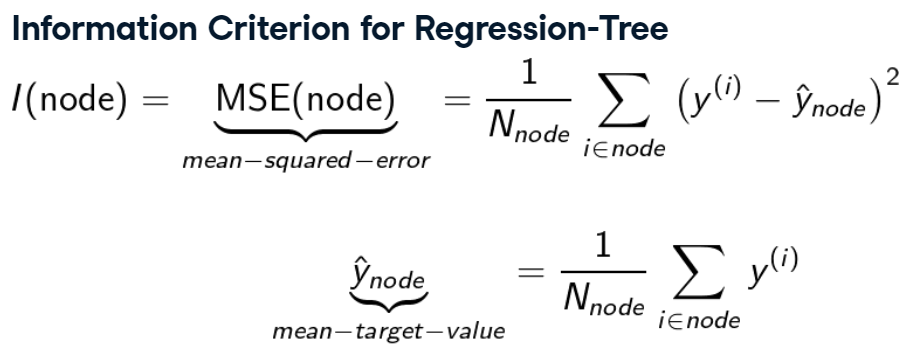

트리가 데이터 셑에 대해 훈련된 경우, node의 불순물은 해당 노드에 있는 대상의 평균제곱오차를 사용하여 측정됨.
it means 회귀 트리가 각 잎에서 잎을 생성하는 분할을 찾으려 시도.  목표값 => 해당 특정 leaf 레이블 평균값
where in each leaf the target values are on average, the closest possible to the mean-value of the labels in the particular leaf

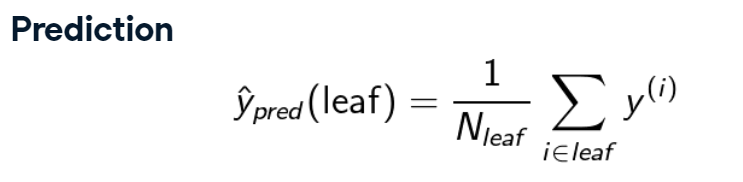

In [ ]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test,y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

# Generalization Error

실제로 데이터 생성 y=f(x)에는 + noise (임의성 또는 노이즈) 수반
* overfitting : fits the training set noise
* underfitting : not flexible enough to approximate f.

**F^ = bias^2 + variance + irreducible error
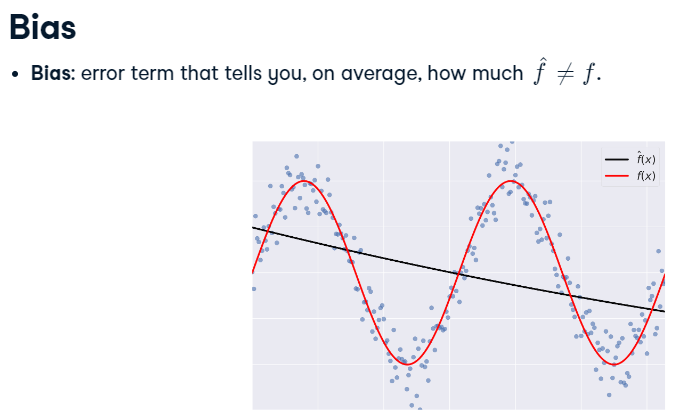
high bias => underfitting
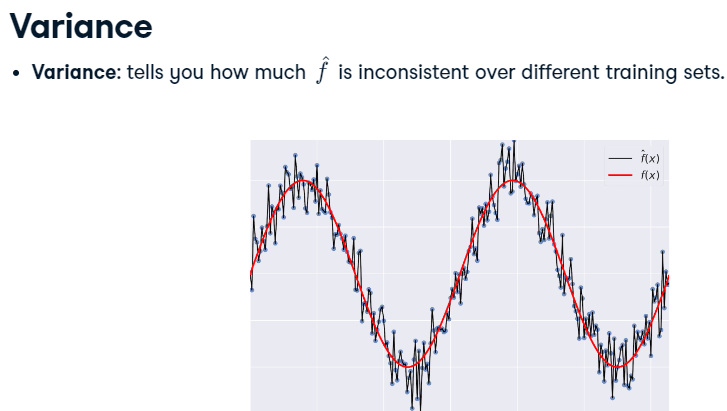
high variance => overfitting
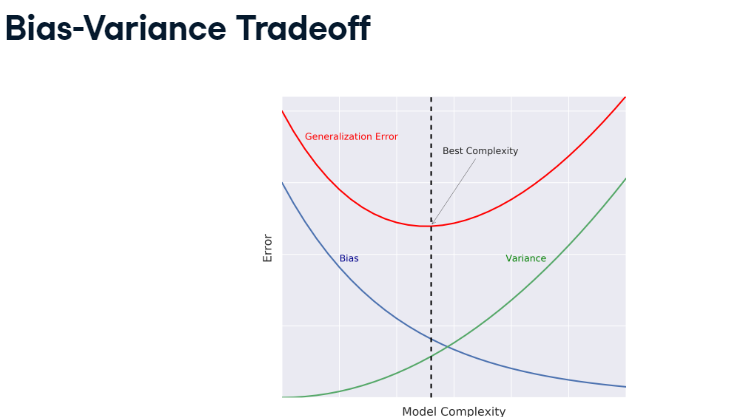

# Dignose bias and variance problems

*high variance
CV error of f^ > training set error of f^
f^ is overfit the training set 

*high bias 
CV error of f^ ~~ training set error of f^ >> desired error
f^ is underfit the training set

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
# set seed for reproducibility
SEED = 123
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=SEED)
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=SEED)

#evalute the list of MSE ontained by 10-fold CV
#Set n_jobs to -1 in order to exploit all CPU cores in computation : 사용 가능한 모든 CPU 활용
MSE_CV = - cross_val_score(dt, X_train, y_train, cv=10, scoring = 'neg_mean_squared_error', n_jobs = -1)

dt.fit(X_train, y_train)
y_predict_train = dt.predict(X_train)
y_predict_test = dt.predict(X_test)

print('CV MSE : {:.2f}'.format(MSE_CV.mean()))
print('CV MSE : {:.2f}'.format(MSE(y_train, y_predict_train)))
print('CV MSE : {:.2f}'.format(MSE(y_test, y_predict_test)))


In [ ]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

# Ensemble Learning
Advantages of CARTs
* Flexibility
벗. 작은 변화에도 민감. / high variance도 문제.
* ensemble learning's adv
train different models, make its predictions, Meta-model : aggregates predictions of individual models
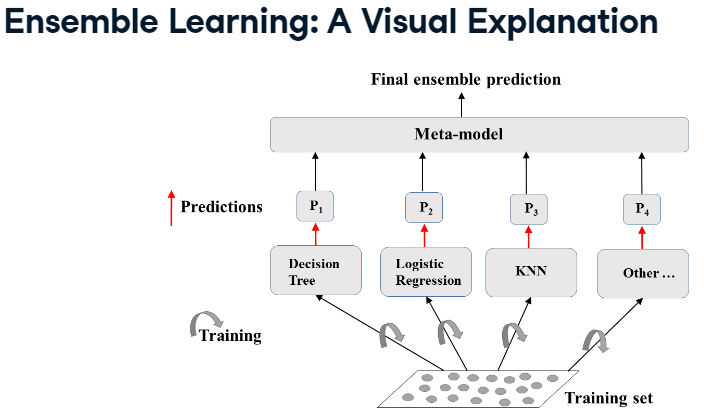


In [ ]:
#compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=SEED)

lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
#define a list called classifier (name, classifier)
classsifiers = [('Logistic Regression',lr),('K Nearest Neighbours',knn),('Classification Tree',dt)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
    
    
#instantiate a votingclassifier 'vc'
vc = VotingClssifier(estimators=classifiers)
vc.fit(X_train, y_train) #fit
y_pred = vc.predict(X_test) #predict test set lables

print('Voting Classifier: {.3f}'.format(accuracy_score(y_test, y_pred)))

# Bagging (Bootstrap Aggregation) 집계
one algorithm
reduces variance of individual models in the ensemble
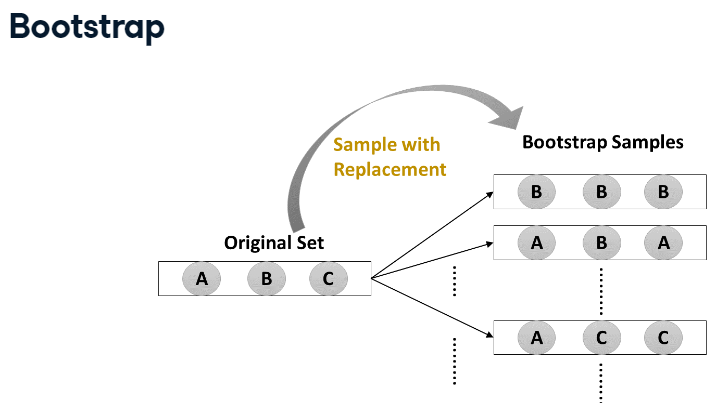
replacement mean 여러번 뽑기 가능
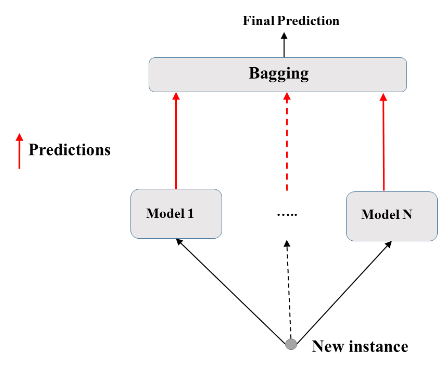
*Classification
Aggregates predictions by majority voting (과반수)
*Regression
through avraging (개별모델에 의해 만들어진 예측)


In [ ]:
#compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#including VotingClassifier meta-model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingaClassifier

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y, random_state=SEED)

dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED) #instantiate a classification-tree 'dt'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1) #instantiate a BaggingClassifier 'bc' 300개의 분류트리, 모든 CPU 이용

bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {.3f}'.format(accuracy))
#bagging 이 기본 추정기 dt를 능가함

# Out of Bagn(OOB) Evaluation
훈련 중 모델에 사용되지 않은 것들 사용 (교차검증 없음
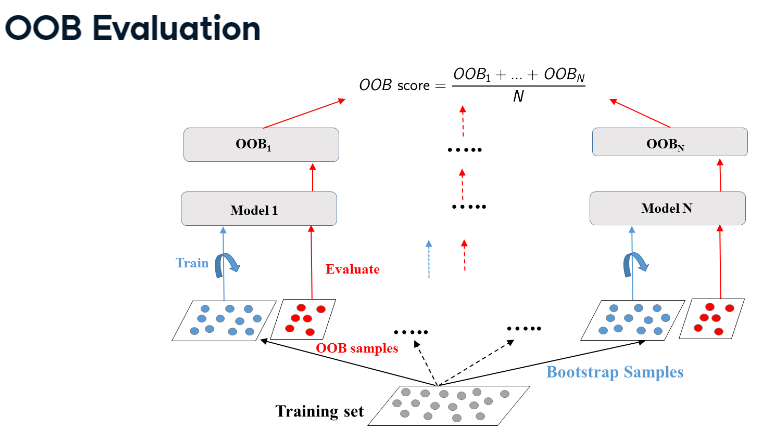


In [ ]:
#위에 다 같고 
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED) #instantiate a classification-tree 'dt'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1) 
#instantiate a BaggingClassifier 'bc' 300개의 분류트리, 모든 CPU 이용
#훈련후 OOB 정확도 평가 위해 oob_score=true

bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
oob_accuracy = bc.oob_score_

print('Test set accuracy: {.3f}'.format(test_accuracy))
#bagging 이 기본 추정기 dt를 능가함
print('OOB accuracy: {.3f}'.format(oob_accuracy))
# oob의 정확도 -> 보이지 않는 데이터에 대한 배깅 앙상블의 성능 추정


# Random Forests (RF)

**Bagging
* Base estimator : Decision Tree, Logistic Regression, Neural Net...
각 추정기는 훈련셑 추출한 고유 부트스트랩 샘플에서 훈련됨

**RF's  Base estimator : Decision Tree
배깅보다 더 많은 randomization을 이용
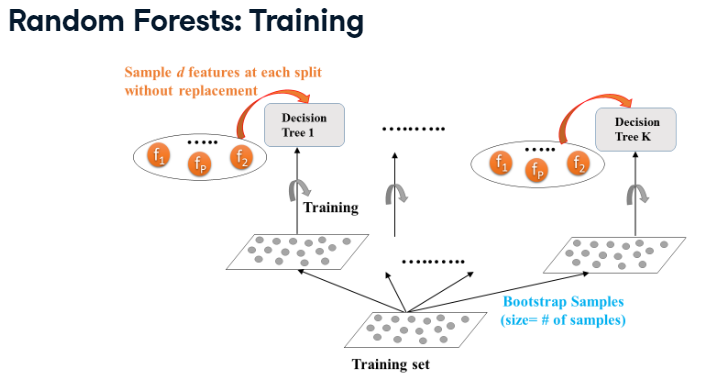
교체 없이 d개의 기능만 샘플링


In [ ]:
#compute accuracy and split data
from sklearn.model_selection import train_test_split
#including VotingClassifier meta-model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=SEED)

rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)
print('Test set RMSE of rf : {:.2f}'.format(rmse_test))

*Feature Importance
- how much the tree nodes use a particular feature (weighted average) to reduce impurity
- 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', colot = 'lightgreen'); 
plt.show()

# AdaBoost (boosting 방법 1)
*Boosting : 약한 학습자들 결합되어 강한 학습자 형성
- weak learner : random보단 나은 , decision-stump 최대 깊이 1 \

**ADAptive BOOSTing
achieved by changing the weights of the training instances
assigned a coefficient a(알파) => predictors's training error
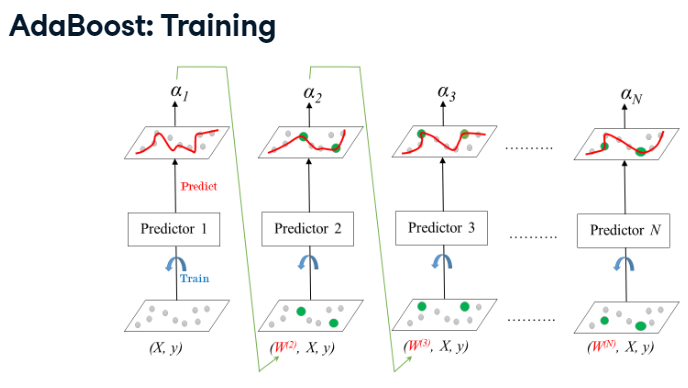
error 들로 다음 계수 알파가 정해짐 (weight)
0< eta<1  계수 알파를 축소하는 데 사용.


In [ ]:
#compute accuracy and split data
from sklearn.model_selection import train_test_split
#including VotingClassifier meta-model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=SEED)

dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)

#instantiate an AdaBoost
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators = 100)
adb_clf.fit(X_train, y_train)
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

#evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print ('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

# Gradient Boosting (boosting 2)
선행자의 오류 개선,  instance의 가중치는 조정되지 X
using its predecessor's residual errors as labels (잔차 오차 이용)
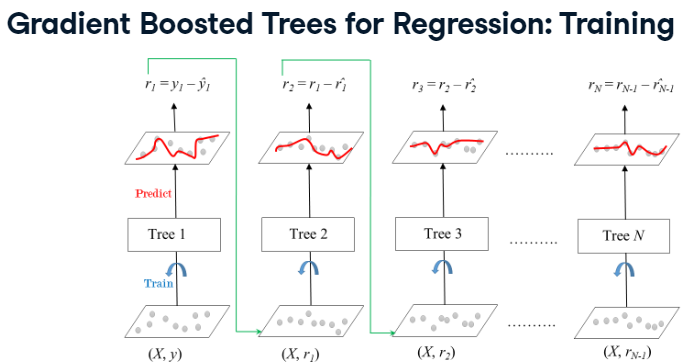
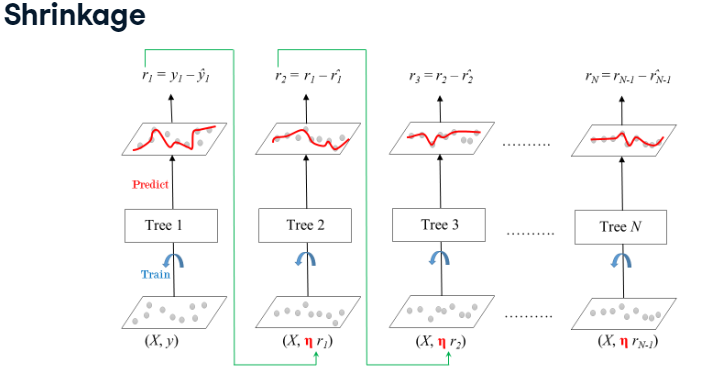
*shrinkage  = 학습률 eta를 곱한 후 축소
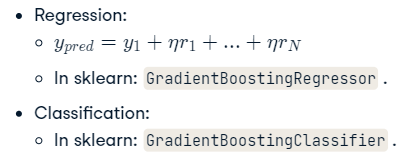


In [ ]:
#compute accuracy and split data
from sklearn.model_selection import train_test_split
#including VotingClassifier meta-model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=SEED)

#instantiate 
gbt = GradientBoostingRegressor(n_estimators = 300, max_depth = 1, random_state=SEED)
gbt.fit(X_train, y_train)
y_pred = gbt.predict(X_test)
rmse_test = MSE(y_test, y_pred)**(1/2)

print('Test set RMSE: {:.2f}'.format(rmse_test))

# Stochastic Gradient Boosting (SGB)
좋은 것만 찾다보면 반복될 수 있음 
-> 확률적 기울기 부스팅
Features are sampled (without replacement) when choosing split points 
get diversity, adding further variance ro the ensemble of trees
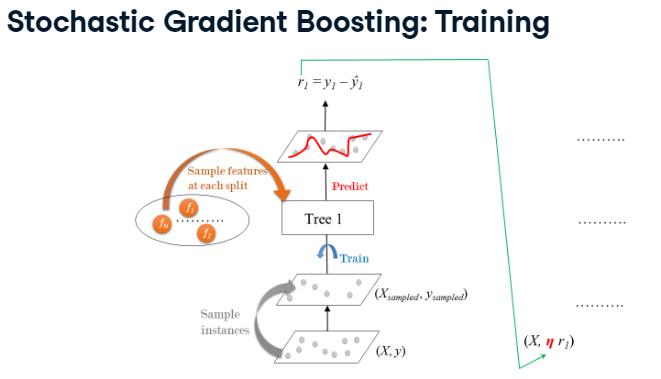



In [ ]:
#compute accuracy and split data
from sklearn.model_selection import train_test_split
#including VotingClassifier meta-model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=SEED)

#instantiate  훈련용 80%, 사용한 기능의 20%만 사용하여 최상의 분할
sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=SEED)
sgbt.fit(X_train, y_train)
y_pred = sgbt.predict(X_test)
rmse_test = MSE(y_test, y_pred)**(1/2)

print('Test set RMSE: {:.2f}'.format(rmse_test))

# Tuning a CART's hyperparameters
*parameters : learned from data (split-point of a node, feature...)
*hyperparameters : not learned, set prior to training (max_depth, min_samples_leaf, splitting criterion...)

-score : accuracy and R^2 (regression) 간의 일치 측정



In [ ]:
from sklearn.tree import DecisionTreeClassifier

SEED = 1
 
dt = DecisionTreeClassifier(random_state=SEED)

#dt의 hyperparametors 출력
print(dt.get_params())

from sklearn.model_selection import GridSearchCV
#define
params_dt = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_leaf': [0.04, 0.06, 0.08],
    'max_features': [0.2, 0.4, 0.6, 0.8]
}
#instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator = dt,
                      parm_grid = params_dt,
                       scoring = 'accuracy',
                      cv =10, n_jobs=-1)

grid_dt.fit(X_train, y_train)

best_hyperparams = grid_dt.best_params_
print (best_hyperparams)

In [ ]:

# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = grid_dt.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test,y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

# Tuning an RF's Hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metric import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
SEED = 1
rf = RandomForestRegressor(random_state = SEED)
#inspect rf's hyperparameters
rf.get_params()

param_rf = {
    'n_estimators': [300,400,500],
    'max_depth': [4,6,8],
    'min_samples_leaf': [0.1,0.2],
    'max_features': ['log2', 'sqrt']
}

grid_rf = GridSearchCV(estimator = rf, 
                      param_grid=params_rf,
                      cv=3,
                      scoring='neg_mean_squared_error',
                      verbose=1,
                      n_jobs=-1)

grid_rf.fit(X_train, y_train)

best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)

#Extract the best model from 'grid_rf'
best_model = grid_rf.best_estimator_
y_pred = best_model.predict(X_test)
rmse_test = MSE(y_test, y_pred)**(1/2)

print('Test set RMSE of rf: {:.2f}'.format(rmse_test))